In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [15]:
dt = 0.2; 
t = np.arange(0,10+dt,dt)
#print(t)

time_span = {"time":t}

measures = np.arange(0,len(t))

data = pd.DataFrame({"sample":measures})
data["time"]= t
raw_signal = [14.4 + 2*np.random.normal(0,2,1)[0] for value in data["time"]]
data["raw_signal"] = raw_signal
data['filtered_signal_fnc'] = np.zeros((data.shape[0],1))
data['filtered_signal_own'] = np.zeros((data.shape[0],1))
data.head(10)

,sample,time,raw_signal,filtered_signal_fnc,filtered_signal_own
0,0,0.0,14.404766,0.0,0.0
1,1,0.2,11.286736,0.0,0.0
2,2,0.4,15.517573,0.0,0.0
3,3,0.6,8.300544,0.0,0.0
4,4,0.8,13.324992,0.0,0.0
5,5,1.0,12.109145,0.0,0.0
6,6,1.2,5.755496,0.0,0.0
7,7,1.4,14.742045,0.0,0.0
8,8,1.6,10.985275,0.0,0.0
9,9,1.8,17.088420,0.0,0.0


In [5]:
print(len(t))


51


In [3]:
def full_avg_filt(aIndex, aPrevAvg = 0, aCurrentSignal = 0):
    if aIndex == 0:
        lPrevAvg = 0
        lk = 1
    else: 
        lPrevAvg = aPrevAvg
        lk = aIndex + 1
    
    lAlpha = (lk -1) / lk
    return lAlpha * lPrevAvg + (1 - lAlpha)*aCurrentSignal

In [4]:
for index in range(data.shape[0]):
    if index == 0: 
        prevAvg = 0
        k = 1
    else:
        prevAvg = data["filtered_signal_own"][index-1]
        k = index + 1
    
    alpha = (k-1)/k
    data["filtered_signal_own"][index] = alpha*prevAvg + (1-alpha)*data["raw_signal"][index]
    data["filtered_signal_fnc"][index] = full_avg_filt(aIndex = index, 
                                                       aPrevAvg = prevAvg,
                                                       aCurrentSignal = data["raw_signal"][index])
             

In [9]:
data

,time,raw_signal,filtered_signal_fnc,filtered_signal_own
0,0.0,16.531289,16.531289,16.531289
1,0.2,18.890671,17.710980,17.710980
2,0.4,19.474085,18.298682,18.298682
3,0.6,18.711622,18.401917,18.401917
4,0.8,12.337343,17.189002,17.189002
5,1.0,11.593896,16.256484,16.256484
6,1.2,15.217818,16.108104,16.108104
7,1.4,17.812181,16.321113,16.321113
8,1.6,9.749196,15.590900,15.590900
9,1.8,9.964911,15.028301,15.028301


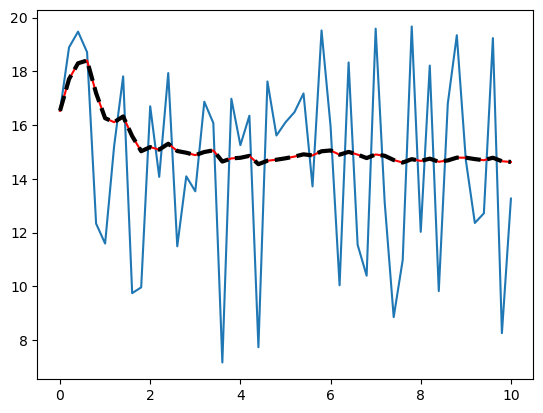

In [10]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(data["time"],data["raw_signal"],label='raw signal')
axes.plot(data["time"],data["filtered_signal_own"],color='r', label="filtered signal")
axes.plot(data["time"],data["filtered_signal_fnc"],color='k', linestyle='dashed', linewidth=3, label="filtered signal fnc")